In [6]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
%matplotlib inline
df = pd.read_csv(r'Iris.csv')
df
df.drop('Id',axis=1,inplace=True)
df.head()
df.isnull().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

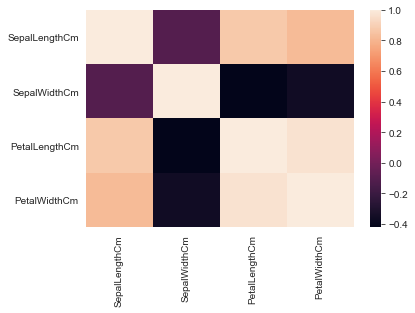

In [7]:
#Finding the correlation between the features
df.corr()
# Checking outliers
sns.boxplot(x=df['SepalLengthCm'])
# Visualizing the correlation between the features
sns.heatmap(df.corr())

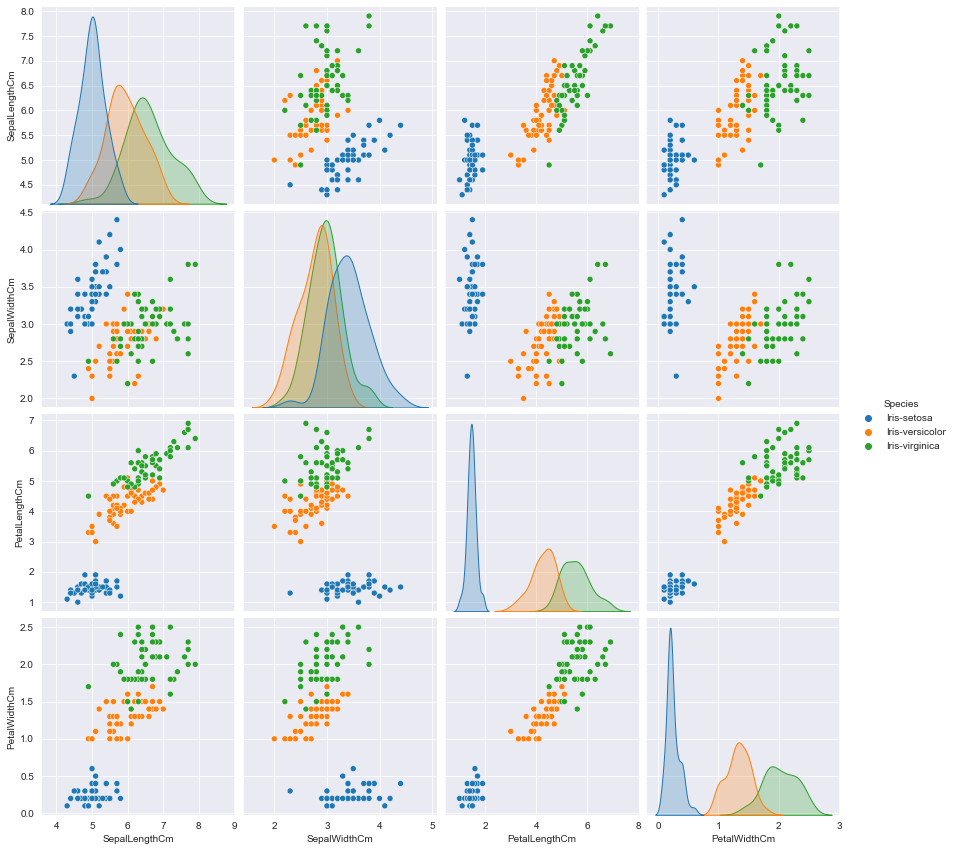

In [8]:

# Visualizing the correlation between the features

sns.set_style("darkgrid")
sns.pairplot(df, hue="Species", height=3);
plt.show()

<ipython-input-9-415977eb551a>:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ks, inertias, '-o',linestyle='dashed',color='green')


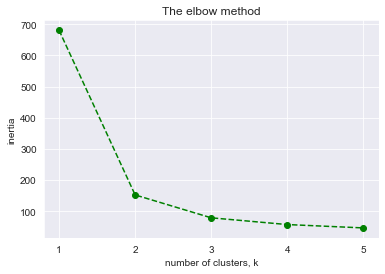

In [9]:
from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []
x = df.iloc[:, [0, 1, 2, 3]].values
for k in ks:
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x)
    
   
 # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o',linestyle='dashed',color='green')
plt.title('The elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
kmeans = KMeans(n_clusters=3)

kmeans.fit(x)
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

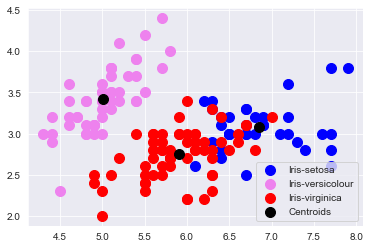

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [11]:
# Create a DataFrame with labels and species as columns: df
df2 = pd.DataFrame({'labels':labels,'species':df['Species']})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['species'])

print(ct)



species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                 50                0               0
2                  0               48              14


In [12]:
# Perform the necessary imports
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Create scaler: scaler
scaler = Normalizer()

x = scaler.fit_transform(x)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
kmeans.fit(x)
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                 50                0               0
1                  0                5              50
2                  0               45               0


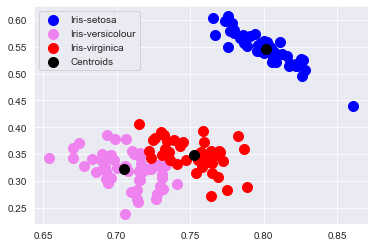

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
# Create a DataFrame with labels and species as columns: df
df2 = pd.DataFrame({'labels':labels,'species':df['Species']})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['species'])

# Display ct
print(ct)